In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = load_iris()
X_raw = data.data
y = data.target

In [21]:
for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X_raw)
    explained = pca.explained_variance_ratio_
    print(f"k = {k}")
    print(f"Explained variance ratio: {explained}")
    print(f"Total: {np.sum(explained):.4f}")

k = 1
Explained variance ratio: [0.92461872]
Total: 0.9246
k = 2
Explained variance ratio: [0.92461872 0.05306648]
Total: 0.9777
k = 3
Explained variance ratio: [0.92461872 0.05306648 0.01710261]
Total: 0.9948
k = 4
Explained variance ratio: [0.92461872 0.05306648 0.01710261 0.00521218]
Total: 1.0000


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

for k in range(1, 5):
    pca = PCA(n_components=k)
    pca.fit(X_scaled)
    explained = pca.explained_variance_ratio_
    print(f"k = {k}")
    print(f"Explained variance ratio: {explained}")
    print(f"Total: {np.sum(explained):.4f}")

k = 1
Explained variance ratio: [0.72962445]
Total: 0.7296
k = 2
Explained variance ratio: [0.72962445 0.22850762]
Total: 0.9581
k = 3
Explained variance ratio: [0.72962445 0.22850762 0.03668922]
Total: 0.9948
k = 4
Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Total: 1.0000


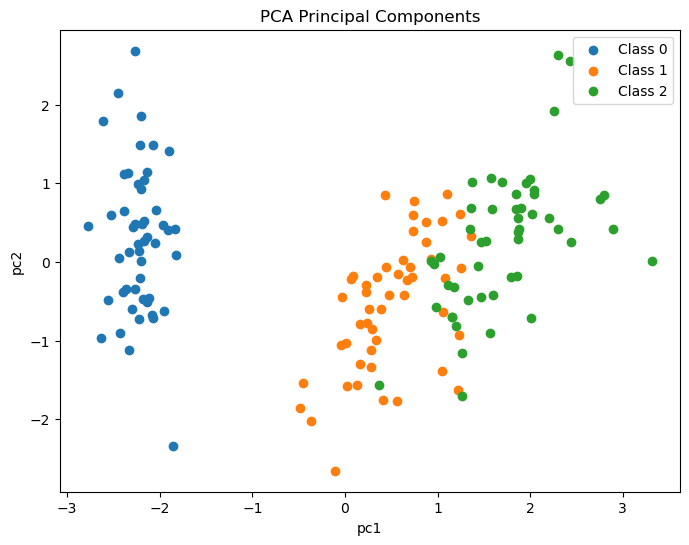

In [19]:
secondPCA = PCA(n_components=2)
X2 = secondPCA.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for classNum in np.unique(y):
    plt.scatter(X2[y == classNum, 0], X2[y == classNum, 1], label=f"Class {classNum}")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("PCA Principal Components")
plt.legend()
plt.show()

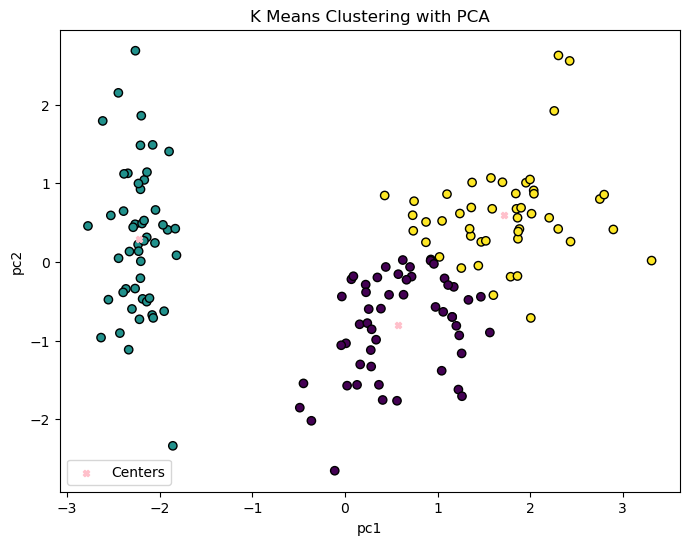

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X2)

plt.figure(figsize=(8, 6))
plt.scatter(X2[:, 0], X2[:, 1], c=clusters, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=20, c='pink', label='Centers')
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.title("K Means Clustering with PCA")
plt.legend()
plt.show()